In [67]:
from scipy.stats import laplace
import matplotlib.pyplot as plt
import pandas as pd

## Apresenta Laplace

In [68]:
def ApresentarDistribuicao(l, s):
    fig, ax = plt.subplots(1, 1)
    #b = scale 
    #u = loc
    r = laplace.rvs(loc=l, scale=s, size=1000)# media, desvio padrao, quantidade de valores
    ax.hist(r, density=True)
    plt.show()

## Importa DataBase

In [69]:
dataset = pd.read_csv("adult.csv")

## Consultas
1. Q1: Média do atributo age
2. Q2: Somatório do atributo capital-gain;
3. Q3: Média do atributo hours-per-week ;
4. Q4: Quantidade de pessoas com income > 50K.

In [70]:
def PreProcessamentoDataset(dataset,numeroQuestao=4):
    if(numeroQuestao == 4):
        return dataset[ dataset["class"] == ">50K" ]
    return dataset

In [71]:
def Q1(dataset):
    return dataset.age.mean()

def Q2(dataset):
    return dataset.capitalgain.sum()

def Q3(dataset):
    return dataset.hoursperweek.mean()

def Q4(dataset):
    DatasetProcessado = PreProcessamentoDataset(dataset,4)
    return DatasetProcessado.shape[0]

## Vizinhaça

In [72]:
def gerarVizinho(dataset,linhaRemover):
    return dataset.drop([linhaRemover])

def gerarListaVizinhos(dataset):
    listaTodosVizinhos = []
    for i in range(dataset.shape[0]):
        listaTodosVizinhos.append( gerarVizinho(dataset, i) )
    return listaTodosVizinhos

## Sensibilidade

In [73]:
def deltaF(dataset,f):
    maiorDiferenca = 0
    for vizinho in gerarListaVizinhos(dataset):
        diferenca = abs ( f(dataset) - f(vizinho) )
        if( maiorDiferenca < diferenca):
            maiorDiferenca = diferenca
    return maiorDiferenca

## Laplace

In [79]:
def LAP(x):
    ApresentarDistribuicao(0,(x/e))
    return laplace.rvs(loc=u, scale= (x/e) )

# Mecanismo

In [80]:
e = 1 # ε = {0.1, 1, 10}
b = e
u = 0

def Ml(dataset,funcao):
    delta = deltaF(dataset, funcao)
    print(delta)
    lap = LAP( delta )
    print(lap)

    return funcao(dataset) + lap

In [81]:
d = {'nome': ["z", "s","g","l"], 'casas': [4,2,7,1]}
df = pd.DataFrame(data=d)

In [82]:
def f1(dataset):
    return dataset.casas.sum()

7


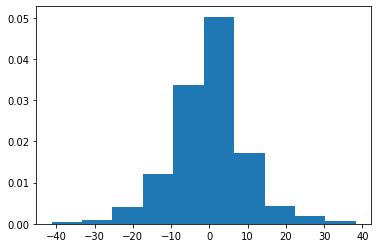

8.80773515302657


22.80773515302657

In [83]:
Ml(df, f1)